In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os

import keras
from keras.models import Model, load_model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.callbacks import ModelCheckpoint

from dataloader import trainGenerator, validGenerator
from model_9_layer_GSLRE import build_model_GSLRE

Using TensorFlow backend.


In [14]:
rootDir='./data/image_data'
trainDir = os.path.join(rootDir, 'train')
validDir = os.path.join(rootDir, 'test')

classSize = 500

3755


In [3]:
batchSize = 128
val_batchSize = 128
width, height = 96, 96

In [4]:
vg = validGenerator(validDir, val_batchSize, 96, 96)

Found 223991 images belonging to 3755 classes.


In [5]:
tg = trainGenerator(trainDir, batchSize, 96, 96)

Found 785541 images belonging to 3755 classes.


In [7]:
model = build_model_GSLRE(classSize)
model.load_weights('model_weights_best.hdf5')

In [9]:
checkpointer = keras.callbacks.ModelCheckpoint(filepath='model_weights_best.hdf5',
                                               verbose = 0, save_best_only=True, monitor='val_acc')

In [ ]:
sgd = optimizers.SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
        optimizer='SGD',
        metrics=['accuracy'])
test_loss, test_acc = model.evaluate_generator(vg, verbose=1)

In [11]:
print(test_loss)

1.1738685790929313


In [12]:
model.fit_generator(tg, epochs=6, verbose=1,
                    validation_data=vg,
                    callbacks=[checkpointer])

Epoch 1/6
6138/6138 [==============================] - 1760s 287ms/step - loss: 0.5633 - acc: 0.8799 - val_loss: 1.0023 - val_acc: 0.8125
Epoch 2/6
1509/6138 [======>.......................] - ETA: 19:18 - loss: 0.5056 - acc: 0.8906

KeyboardInterrupt: 

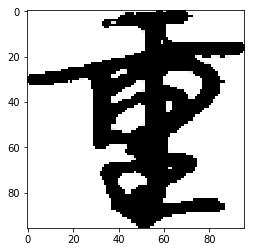

In [7]:
from scipy.ndimage import binary_dilation
temp = vg[7][0][0]
# temp = (temp - temp.min())/ np.ptp(temp)
# print(temp.min())
# plt.imshow(temp.reshape(96,96), cmap='gray')
plt.imshow(temp.reshape(96,96), cmap='gray')